- Auteur : Massimo Bruni
- Association : [810.fr](https://www.810.fr)

# Introduction

Les analyses se baseront sur deux jeux de données distincts : 
1. 2022 :  On a récupéré les statistiques des chaînes officielles des candidat(e)s à la Présidentielle française 2022. On considèrera toutes les vidéos postées sur ces chaînes entre le 1/1/2022 et le 17/3/2022. Les performances des vidéos associées (likes, vues, commentaires) sont donc celles à la date du 17/3/2022.
2. 2021 : On a récupéré les statistiques des chaînes officielles des prétendant(e)s à la Présidentielle française 2022. On ne considérera que les vidéos postées entre le 1/1/2021 et le 1/1/2022.

Par rapport aux articles de [la saison 01 de 810.fr](https://www.810.fr/article-categories/numerique-et-democratie), le premier dataset correspond aux articles d'actualités, ceux de suivi de la campagne. Le second dataset correspond aux articles d'études qui furent réalisés avant la publication de la liste officielle des candidat(e)s.

In [1]:
from gen_dataset_810 import mb_ds
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Année 2022 - Chaînes des candidat(e)s confirmé(e)s

In [2]:
# Init YouTube Data : On ne prend que les videos du 1/1/22 qu 17/3/22
datemin = datetime.datetime(2022, 1, 1, 0, 0, 0)
# Je prends les data de la mi mars. C'est un mois avant les elections, donc peut etre que cela peut dire des choses interessantes
folder_candidats = './donnees_extraites/candidats/2022_03_17/'
dt_candidats = mb_ds()
videos_candidats, chaines_candidats  = dt_candidats.get_full_data_candidat(folder = folder_candidats)
videos_candidats = videos_candidats[videos_candidats['dateVideo'] > datemin]
videos_candidats.shape

Imported 11 channel data


(637, 16)

In [3]:
videos_candidats.head(1)

dateRqt      candidat  parti         courant        chaine  \
1  2022/03/17  Eric Zemmour  Aucun  Extrême droite  Éric Zemmour   

                                          titreVideo       vid_id  \
1  Éric Zemmour face à Jean-Luc Mélenchon chez Cy...  xDwKy6tSCbg   

            dateVideo                                         liste_tags  \
1 2022-01-28 11:15:15  [Éric Zemmour face à jean-luc mélenchon, zemmo...   

  livebroadcast  vuesVideo  likesVideo  dislikesVideo  favVideo  comzVideo  \
1          none    2001262       36577              0         0      20886   

       dureeVideo  
1 0 days 01:07:11

### Représentation globale des différents courants politiques

In [4]:
print("Part vidéos d'Extrême droite : ",  videos_candidats['courant'].value_counts()['Extrême droite']/videos_candidats.shape[0])
print("Part vidéos d'Extrême gauche : ",  videos_candidats['courant'].value_counts()['Extrême gauche']/videos_candidats.shape[0])
print("Part vidéos de droite : ",  videos_candidats['courant'].value_counts()['droite']/videos_candidats.shape[0])
print("Part vidéos de gauche : ",  videos_candidats['courant'].value_counts()['gauche']/videos_candidats.shape[0])
print("Part vidéos de la majorité : ",  videos_candidats['courant'].value_counts()['majorité']/videos_candidats.shape[0])
print("Part vidéos des verts : ",  videos_candidats['courant'].value_counts()['vert']/videos_candidats.shape[0])
print("Part vidéos courants divers : ",  videos_candidats['courant'].value_counts()['divers']/videos_candidats.shape[0])

Part vidéos d'Extrême droite :  0.40345368916797486
Part vidéos d'Extrême gauche :  0.2150706436420722
Part vidéos de droite :  0.09105180533751962
Part vidéos de gauche :  0.06279434850863422
Part vidéos de la majorité :  0.03924646781789639
Part vidéos des verts :  0.15384615384615385
Part vidéos courants divers :  0.03453689167974882


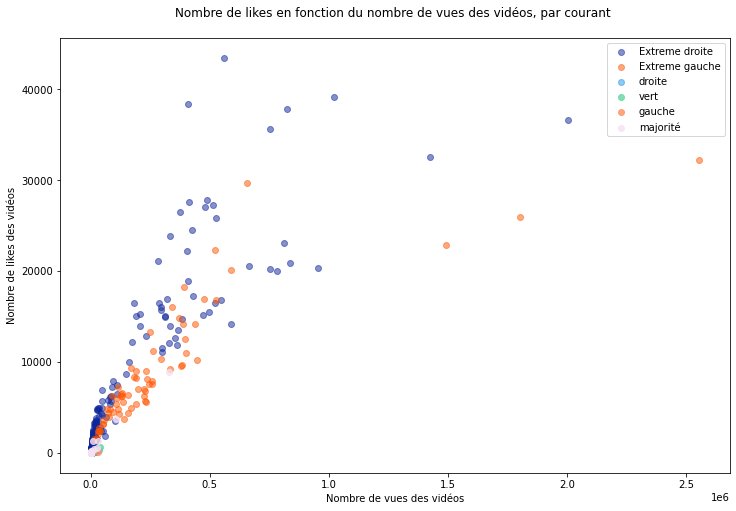

In [5]:
plt.figure(figsize=(12, 8))
# sns.scatterplot(x = 'vuesVideo', y = 'likesVideo', data=smds, hue= 'courant', alpha=0.5)
plt.scatter(x = videos_candidats[videos_candidats['courant'] == 'Extrême droite']['vuesVideo'], y = videos_candidats[videos_candidats['courant'] == 'Extrême droite']['likesVideo'], alpha=0.5, color = '#0F259A', label = 'Extreme droite')
plt.scatter(x = videos_candidats[videos_candidats['courant'] == 'Extrême gauche']['vuesVideo'], y = videos_candidats[videos_candidats['courant'] == 'Extrême gauche']['likesVideo'], alpha=0.5, color = '#FF5500', label = 'Extreme gauche')
plt.scatter(x = videos_candidats[videos_candidats['courant'] == 'droite']['vuesVideo'], y = videos_candidats[videos_candidats['courant'] == 'droite']['likesVideo'], alpha=0.5, color = '#1E93EA', label = 'droite')
plt.scatter(x = videos_candidats[videos_candidats['courant'] == 'vert']['vuesVideo'], y = videos_candidats[videos_candidats['courant'] == 'vert']['likesVideo'], alpha=0.8, color = '#62D8A0', label = 'vert')
plt.scatter(x = videos_candidats[videos_candidats['courant'] == 'gauche']['vuesVideo'], y = videos_candidats[videos_candidats['courant'] == 'gauche']['likesVideo'], alpha=0.8, color = '#FF9061', label = 'gauche')
plt.scatter(x = videos_candidats[videos_candidats['courant'] == 'majorité']['vuesVideo'], y = videos_candidats[videos_candidats['courant'] == 'majorité']['likesVideo'], alpha=0.8,color = '#F6E2F4', label = 'majorité')
plt.legend()
plt.xlabel("Nombre de vues des vidéos")
plt.ylabel("Nombre de likes des vidéos")
plt.title("Nombre de likes en fonction du nombre de vues des vidéos, par courant \n")
plt.show()

Les points bleus foncés ont tendances à être plus haut que les autres. Quelques valeurs extrêmes empêche de voir le détail par courant. On va élaguer lkes rares vidéos qui on sur-performé (_outliers_). Juste pour pouvoir zoomer sur la zone de concentration des points contenant la plupart des courants. Pour cela on va donc simplement considérer les trois premiers quartiles.

In [6]:
videos_candidats.describe()

vuesVideo    likesVideo  dislikesVideo  favVideo     comzVideo  \
count  6.370000e+02    637.000000          637.0     637.0    637.000000   
mean   7.921319e+04   3220.155416            0.0       0.0    657.087912   
std    2.208859e+05   6690.985647            0.0       0.0   1790.556830   
min    1.200000e+01      2.000000            0.0       0.0      0.000000   
25%    9.200000e+02     39.000000            0.0       0.0      3.000000   
50%    4.888000e+03    285.000000            0.0       0.0     32.000000   
75%    2.355000e+04   2442.000000            0.0       0.0    327.000000   
max    2.553813e+06  43482.000000            0.0       0.0  20886.000000   

                      dureeVideo  
count                        637  
mean   0 days 00:25:02.604395604  
std    0 days 00:33:54.211479480  
min              0 days 00:00:00  
25%              0 days 00:02:47  
50%              0 days 00:09:58  
75%              0 days 00:33:01  
max              0 days 03:20:54

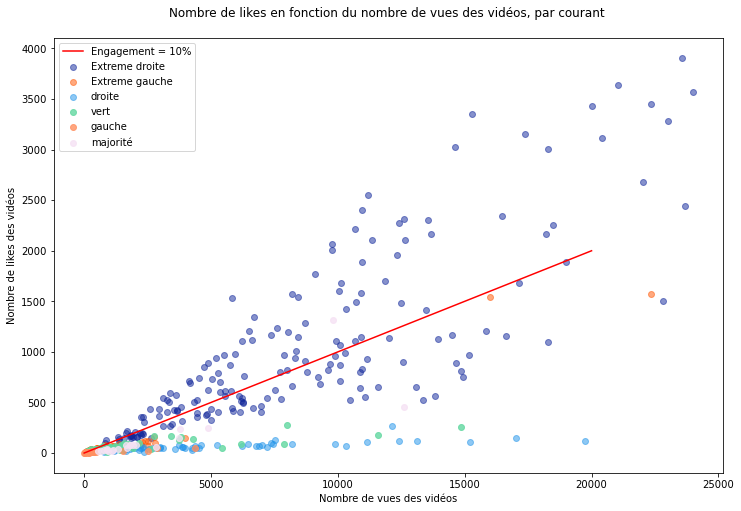

In [7]:
# Sous-échantillon des trois premier quartile
q3 = videos_candidats[videos_candidats['vuesVideo'] < 24000]
# Fonction du seuil d'engagement à 10%
x = np.arange(0, 24000, 10000)
y = x*0.1

plt.figure(figsize=(12, 8))
# sns.scatterplot(x = 'vuesVideo', y = 'likesVideo', data=smds, hue= 'courant', alpha=0.5)
plt.scatter(x = q3[q3['courant'] == 'Extrême droite']['vuesVideo'], y = q3[q3['courant'] == 'Extrême droite']['likesVideo'], alpha=0.5, color = '#0F259A', label = 'Extreme droite')
plt.scatter(x = q3[q3['courant'] == 'Extrême gauche']['vuesVideo'], y = q3[q3['courant'] == 'Extrême gauche']['likesVideo'], alpha=0.5, color = '#FF5500', label = 'Extreme gauche')
plt.scatter(x = q3[q3['courant'] == 'droite']['vuesVideo'], y = q3[q3['courant'] == 'droite']['likesVideo'], alpha=0.5, color = '#1E93EA', label = 'droite')
plt.scatter(x = q3[q3['courant'] == 'vert']['vuesVideo'], y = q3[q3['courant'] == 'vert']['likesVideo'], alpha=0.8, color = '#62D8A0', label = 'vert')
plt.scatter(x = q3[q3['courant'] == 'gauche']['vuesVideo'], y = q3[q3['courant'] == 'gauche']['likesVideo'], alpha=0.8, color = '#FF9061', label = 'gauche')
plt.scatter(x = q3[q3['courant'] == 'majorité']['vuesVideo'], y = q3[q3['courant'] == 'majorité']['likesVideo'], alpha=0.8,color = '#F6E2F4', label = 'majorité')
plt.plot(x, y, c='r', label = "Engagement = 10%")
plt.legend()
plt.xlabel("Nombre de vues des vidéos")
plt.ylabel("Nombre de likes des vidéos")
plt.title("Nombre de likes en fonction du nombre de vues des vidéos, par courant \n")
plt.show()

Au-delà de la sur-représentation de l'extrême droite, on constate que ce sont les seules vidéos - ou presque, à pouvoir générer un engagement (likes/vues)supérieur à 10%.

Pour mettre en valeur cette tendance à surperformer, on va faire une régression linéaire par courant, comme si nous vouliez estimer le nombre de likes d'une vidéo, en fonction de son nombre de vues, selon le courant qui l'a posté.

### Régression linéaire likes/vues par courant

In [8]:
from sklearn.linear_model import LinearRegression

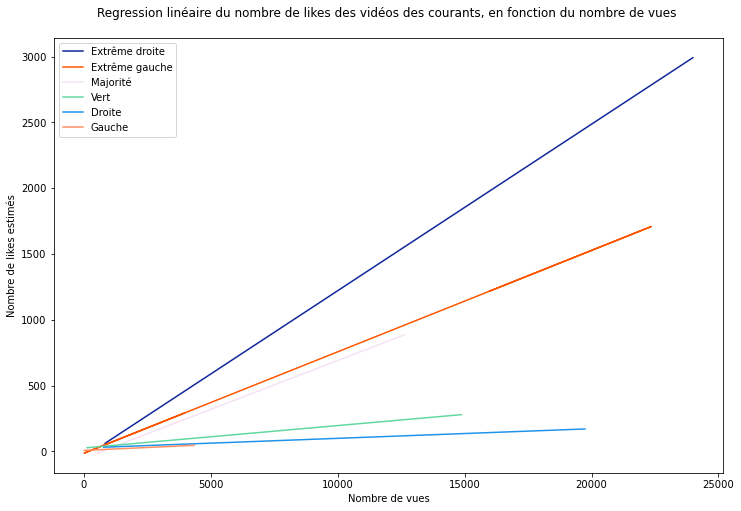

In [26]:
model = LinearRegression()
smds = q3.dropna(axis=0)
valeur_0 = np.zeros((1,1))
valeur_1 = np.ones((1,1))

# Regression lineaire pour l'extreme droite
X_xd = np.array(smds[smds['courant'] == 'Extrême droite']['vuesVideo'])
X_xd = X_xd.reshape((X_xd.shape[0], 1))
y_xd = np.array(smds[smds['courant'] == 'Extrême droite']['likesVideo'])
y_xd = y_xd.reshape((y_xd.shape[0], 1))
model.fit(X_xd, y_xd)
xd_prediction = model.predict(X_xd)
xd_prediction_0 = model.predict(valeur_0)
xd_prediction_1 = model.predict(valeur_1)

# Regression lineaire pour l'extreme gauche
X_xg = np.array(smds[smds['courant'] == 'Extrême gauche']['vuesVideo'])
X_xg = X_xg.reshape((X_xg.shape[0], 1))
y_xg = np.array(smds[smds['courant'] == 'Extrême gauche']['likesVideo'])
y_xg = y_xg.reshape((y_xg.shape[0], 1))
model.fit(X_xg, y_xg)
xg_prediction = model.predict(X_xg)
xg_prediction_0 = model.predict(valeur_0)
xg_prediction_1 = model.predict(valeur_1)

# Regression lineaire pour la gauche
X_g = np.array(smds[smds['courant'] == 'gauche']['vuesVideo'])
X_g = X_g.reshape((X_g.shape[0], 1))
y_g = np.array(smds[smds['courant'] == 'gauche']['likesVideo'])
y_g = y_g.reshape((y_g.shape[0], 1))
model.fit(X_g, y_g)
g_prediction = model.predict(X_g)
g_prediction_0 = model.predict(valeur_0)
g_prediction_1 = model.predict(valeur_1)

# Regression lineaire pour la droite
X_d = np.array(smds[smds['courant'] == 'droite']['vuesVideo'])
X_d = X_d.reshape((X_d.shape[0], 1))
y_d = np.array(smds[smds['courant'] == 'droite']['likesVideo'])
y_d = y_d.reshape((y_d.shape[0], 1))
model.fit(X_d, y_d)
d_prediction = model.predict(X_d)
d_prediction_0 = model.predict(valeur_0)
d_prediction_1 = model.predict(valeur_1)

# Regression lineaire pour les verts
X_v = np.array(smds[smds['courant'] == 'vert']['vuesVideo'])
X_v = X_v.reshape((X_v.shape[0], 1))
y_v = np.array(smds[smds['courant'] == 'vert']['likesVideo'])
y_v = y_v.reshape((y_v.shape[0], 1))
model.fit(X_v, y_v)
v_prediction = model.predict(X_v)
v_prediction_0 = model.predict(valeur_0)
v_prediction_1 = model.predict(valeur_1)

# Regression lineaire pour la majorité
X_m = np.array(smds[smds['courant'] == 'majorité']['vuesVideo'])
X_m = X_m.reshape((X_m.shape[0], 1))
y_m = np.array(smds[smds['courant'] == 'majorité']['likesVideo'])
y_m = y_m.reshape((y_m.shape[0], 1))
model.fit(X_m, y_m)
m_prediction = model.predict(X_m)
m_prediction_0 = model.predict(valeur_0)
m_prediction_1 = model.predict(valeur_1)

plt.figure(figsize=(12, 8))
plt.plot(X_xd, xd_prediction, color = '#0F259A', label = 'Extrême droite')
plt.plot(X_xg, xg_prediction, color = '#FF5500', label = 'Extrême gauche')
plt.plot(X_m, m_prediction, color = '#F6E2F4', label = 'Majorité')
plt.plot(X_v, v_prediction, color = '#62D8A0', label = 'Vert')
plt.plot(X_d, d_prediction, color = '#1E93EA', label = 'Droite')
plt.plot(X_g, g_prediction, color = '#FF9061', label = 'Gauche')



plt.xlabel("Nombre de vues")
plt.ylabel("Nombre de likes estimés")
plt.title("Regression linéaire du nombre de likes des vidéos des courants, en fonction du nombre de vues \n")
plt.legend()
plt.show()

Pour rappel une régression linéaire est une fonction de la forme : 
$$ f(x) = ax + b$$

Nous allons donc estimer a et b pour chaque courant.

In [10]:
print("b = Prédiction de likes à 0 vues :")
print("Extrême droite : ", xd_prediction_0.min())
print("Extrême gauche : ", xg_prediction_0.min())
print("Droite : ", d_prediction_0.min())
print("Gauche : ", g_prediction_0.min())
print("Verts : ", v_prediction_0.min())
print("Majorité : ", m_prediction_0.min())

b = Prédiction de likes à 0 vues :
Extrême droite :  -43.71676026148634
Extrême gauche :  -13.135490777651086
Droite :  26.912439360146813
Gauche :  8.291908520155864
Verts :  26.69191852312599
Majorité :  -51.14377986832241


In [11]:
print("a = (Prédiction de likes à 1 vues - b):")
print("Extrême droite : ", xd_prediction_1.min() - xd_prediction_0.min())
print("Extrême gauche : ", xg_prediction_1.min() - xg_prediction_0.min())
print("droite : ", d_prediction_1.min() - d_prediction_0.min())
print("gauche : ", g_prediction_1.min() - g_prediction_0.min())
print("verts : ", v_prediction_1.min() - v_prediction_0.min())
print("majorite : ", m_prediction_1.min() - m_prediction_0.min())

a = (Prédiction de likes à 1 vues - b):
Extrême droite :  0.12648828855291327
Extrême gauche :  0.07701809507795687
droite :  0.0073031999633883515
gauche :  0.008835225684245884
verts :  0.01701434362989218
majorite :  0.07422424372939673


L'extrême droite est la seule courbe qui a une pente à deux chiffres.

### Densité du dataset 2022

In [12]:
tmpvc = videos_candidats
tmpvc.drop(['dateRqt', 'candidat', 'parti', 'chaine', 'titreVideo', 'vid_id', 'liste_tags', 'livebroadcast', 'dislikesVideo', 'favVideo', 'dureeVideo'], axis=1, inplace=True)

/home/maximorose/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
tmpvc['likes/vues'] = tmpvc['likesVideo']/tmpvc['vuesVideo']

<ipython-input-13-8386099e1dc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpvc['likes/vues'] = tmpvc['likesVideo']/tmpvc['vuesVideo']


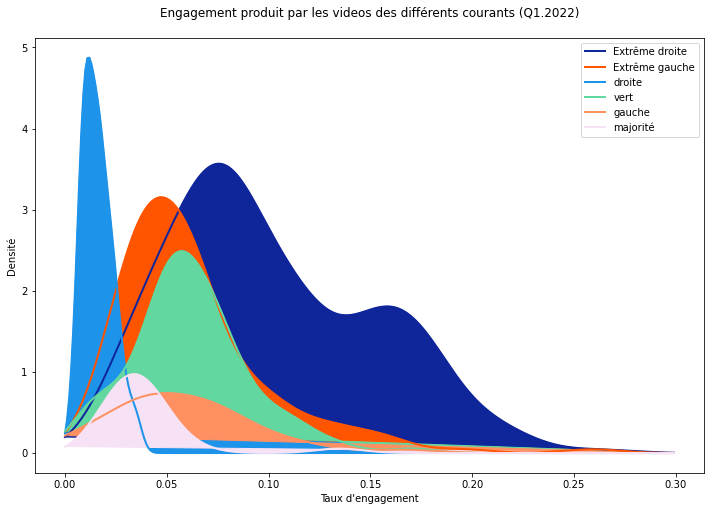

In [14]:
import scipy.stats

dflv_xd = tmpvc[tmpvc['courant'] == 'Extrême droite']['likes/vues']
dflv_xg = tmpvc[tmpvc['courant'] == 'Extrême gauche']['likes/vues']
dflv_d = tmpvc[tmpvc['courant'] == 'droite']['likes/vues'] 
dflv_v = tmpvc[tmpvc['courant'] == 'vert']['likes/vues']
dflv_g = tmpvc[tmpvc['courant'] == 'gauche']['likes/vues']
dflv_m = tmpvc[tmpvc['courant'] == 'majorité']['likes/vues']

kdea = scipy.stats.gaussian_kde(dflv_xd)
kdeb = scipy.stats.gaussian_kde(dflv_xg)
kdec = scipy.stats.gaussian_kde(dflv_d)
kded = scipy.stats.gaussian_kde(dflv_v)
kdee = scipy.stats.gaussian_kde(dflv_g)
kdef = scipy.stats.gaussian_kde(dflv_m)

both = np.hstack((dflv_xd,dflv_xg,dflv_d,dflv_v,dflv_g,dflv_m))
kdeboth = scipy.stats.gaussian_kde(both)
grid = np.arange(0, 0.30, 0.001)

#weighted kde curves
wa = kdea(grid)*(len(dflv_xd)/float(len(both)))
wb = kdeb(grid)*(len(dflv_xg)/float(len(both)))
wc = kdec(grid)*(len(dflv_d)/float(len(both)))
wd = kded(grid)*(len(dflv_v)/float(len(both)))
we = kdee(grid)*(len(dflv_g)/float(len(both)))
wf = kdef(grid)*(len(dflv_m)/float(len(both)))

# print("a.sum ", wa.sum())
# print ("b.sum ", wb.sum())
# print ("total.sum ", kdeb(grid).sum())

fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(grid, wa, lw=2, label = "Extrême droite",color = '#0F259A')
ax.fill(grid, wa,color = '#0F259A')
# ax.scatter(0.101390, 0, color = '#0F259A',  marker='+', s=150) 
ax.plot(grid, wb, lw=2, label = "Extrême gauche",color = '#FF5500')
ax.fill(grid, wb,color = '#FF5500')
# ax.scatter(0.067997, 0, color = '#FF5500',  marker='+', s=150) #
ax.plot(grid, wc, lw=2, label = "droite",color = '#1E93EA')
ax.fill(grid, wc,color = '#1E93EA')
# ax.scatter(0.019360, 0, color = '#1E93EA',  marker='+',s=150) #
ax.plot(grid, wd, lw=2, label = "vert",color = '#62D8A0')
ax.fill(grid, wd,color = '#62D8A0')
ax.plot(grid, we, lw=2, label = "gauche",color = '#FF9061')
ax.fill(grid, we,color = '#FF9061')
ax.plot(grid, wf, lw=2, label = "majorité",color = '#F6E2F4')
ax.fill(grid, wf,color = '#F6E2F4')
# ax.plot(grid, kdeboth(grid), color="crimson", lw=2, label = "pdf")
plt.xlabel("Taux d'engagement")
plt.ylabel('Densité')
plt.title("Engagement produit par les videos des différents courants (Q1.2022)\n")




plt.legend()
plt.show()

### Densité du dataset 2021

In [15]:
# Init YouTube Data : On ne prend que les videos du 1/1/22 qu 17/3/22
dmin21 = datetime.datetime(2021, 1, 1, 0, 0, 0)
dmax21 = datetime.datetime(2022, 1, 1, 0, 0, 0)
# Je prends les data de la mi mars. C'est un mois avant les elections, donc peut etre que cela peut dire des choses interessantes
folder_candidats = './donnees_extraites/candidats/2022_01_04/'
dt_candidats = mb_ds()
videos_candidats_21, chaines_candidats_21  = dt_candidats.get_full_data_candidat(folder = folder_candidats)
videos_candidats_21 = videos_candidats_21[videos_candidats_21['dateVideo'] > dmin21]
videos_candidats_21 = videos_candidats_21[videos_candidats_21['dateVideo'] < dmax21]
videos_candidats_21.shape

Imported 26 channel data


(1760, 16)

In [16]:
videos_candidats_21.drop(['dateRqt', 'candidat', 'parti', 'chaine', 'titreVideo', 'vid_id', 'liste_tags', 'livebroadcast', 'dislikesVideo', 'favVideo', 'dureeVideo'], axis=1, inplace=True)
videos_candidats_21['likes/vues'] = videos_candidats_21['likesVideo']/videos_candidats_21['vuesVideo']

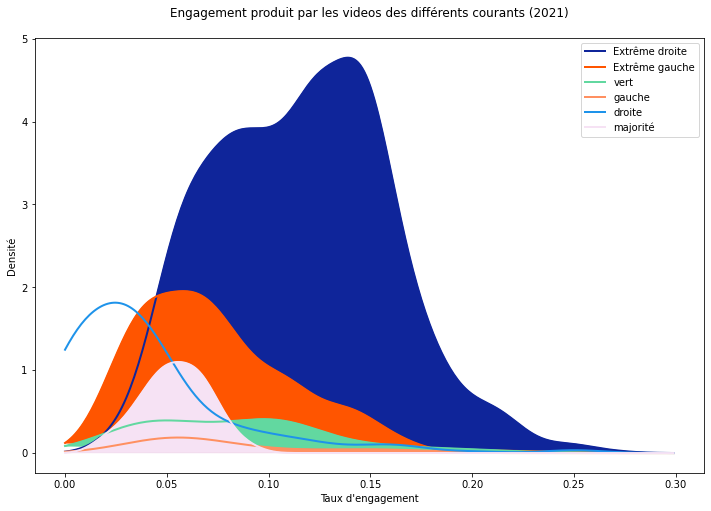

In [17]:
# on supprime les videos avec 0 vues pour eviter les divisions par 0
tmpvc2 = videos_candidats_21[videos_candidats_21['vuesVideo'] > 0]

dflv_xd = tmpvc2[tmpvc2['courant'] == 'Extrême droite']['likes/vues']
dflv_xg = tmpvc2[tmpvc2['courant'] == 'Extrême gauche']['likes/vues']
dflv_d = tmpvc2[tmpvc2['courant'] == 'droite']['likes/vues'] 
dflv_v = tmpvc2[tmpvc2['courant'] == 'vert']['likes/vues']
dflv_g = tmpvc2[tmpvc2['courant'] == 'gauche']['likes/vues']
dflv_m = tmpvc2[tmpvc2['courant'] == 'centre']['likes/vues']

kdea = scipy.stats.gaussian_kde(dflv_xd)
kdeb = scipy.stats.gaussian_kde(dflv_xg)
kdec = scipy.stats.gaussian_kde(dflv_d)
kded = scipy.stats.gaussian_kde(dflv_v)
kdee = scipy.stats.gaussian_kde(dflv_g)
kdef = scipy.stats.gaussian_kde(dflv_m)

both = np.hstack((dflv_xd,dflv_xg,dflv_d,dflv_v,dflv_g,dflv_m))
kdeboth = scipy.stats.gaussian_kde(both)
grid = np.arange(0, 0.30, 0.001)

#weighted kde curves
wa = kdea(grid)*(len(dflv_xd)/float(len(both)))
wb = kdeb(grid)*(len(dflv_xg)/float(len(both)))
wc = kdec(grid)*(len(dflv_d)/float(len(both)))
wd = kded(grid)*(len(dflv_v)/float(len(both)))
we = kdee(grid)*(len(dflv_g)/float(len(both)))
wf = kdef(grid)*(len(dflv_m)/float(len(both)))

# print("a.sum ", wa.sum())
# print ("b.sum ", wb.sum())
# print ("total.sum ", kdeb(grid).sum())

fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(grid, wa, lw=2, label = "Extrême droite",color = '#0F259A')
ax.fill(grid, wa,color = '#0F259A')
# ax.scatter(0.101390, 0, color = '#0F259A',  marker='+', s=150) 
ax.plot(grid, wb, lw=2, label = "Extrême gauche",color = '#FF5500')
ax.fill(grid, wb,color = '#FF5500')
# ax.scatter(0.067997, 0, color = '#FF5500',  marker='+', s=150) #

# ax.scatter(0.019360, 0, color = '#1E93EA',  marker='+',s=150) #
ax.plot(grid, wd, lw=2, label = "vert",color = '#62D8A0')
ax.fill(grid, wd,color = '#62D8A0')
ax.plot(grid, we, lw=2, label = "gauche",color = '#FF9061')
ax.fill(grid, we,color = '#FF9061')

ax.plot(grid, wc, lw=2, label = "droite",color = '#1E93EA')
# ax.fill(grid, wc, color = '#1E93EA')
#ax.fill(wc, wb,color = '#1E93EA')

ax.plot(grid, wf, lw=2, label = "majorité",color = '#F6E2F4')
ax.fill(grid, wf,color = '#F6E2F4')
# ax.plot(grid, kdeboth(grid), color="crimson", lw=2, label = "pdf")
plt.xlabel("Taux d'engagement")
plt.ylabel('Densité')
plt.title("Engagement produit par les videos des différents courants (2021)\n")




plt.legend()
plt.show()

# Application pratique : Concevoir sa plateforme de streaming

On part du dataset 2022, de la première partie.

## 1. Sélection purement aléatoire

Tout d'abord, on se dit qu'on va proposer 100 vidéos à nos utilisateurs en les sélectionnant de manière aléatoire

In [18]:
print("Part vidéos d'Extrême droite : ",  videos_candidats['courant'].value_counts()['Extrême droite']/videos_candidats.shape[0])
print("Part vidéos d'Extrême gauche : ",  videos_candidats['courant'].value_counts()['Extrême gauche']/videos_candidats.shape[0])
print("Part vidéos de droite : ",  videos_candidats['courant'].value_counts()['droite']/videos_candidats.shape[0])
print("Part vidéos de gauche : ",  videos_candidats['courant'].value_counts()['gauche']/videos_candidats.shape[0])
print("Part vidéos de la majorité : ",  videos_candidats['courant'].value_counts()['majorité']/videos_candidats.shape[0])
print("Part vidéos des verts : ",  videos_candidats['courant'].value_counts()['vert']/videos_candidats.shape[0])
print("Part vidéos courants divers : ",  videos_candidats['courant'].value_counts()['divers']/videos_candidats.shape[0])

Part vidéos d'Extrême droite :  0.40345368916797486
Part vidéos d'Extrême gauche :  0.2150706436420722
Part vidéos de droite :  0.09105180533751962
Part vidéos de gauche :  0.06279434850863422
Part vidéos de la majorité :  0.03924646781789639
Part vidéos des verts :  0.15384615384615385
Part vidéos courants divers :  0.03453689167974882


__40% des vidéos seront d'extrême droite, contre 21% d'extrême gauche et 15% de vertes.__

## 2.  Sélection en fonction de l'engagement produit

On va choisir un nombre réduit de vidéos (e.g 10) parmi notre dataset global, pour les présenter de manière aléatoire à l'utilisateur.

On va choisir ces vidéos en fonction de l'engagement qu'elles produisent. On définit un "engagement seuil" qui est l'engagement minimum que l'on souhaite que la vidéo produise. En fonction de cet engagement seuil, on veut voir la part de vidéos proposées pour chacun différents courants.

Pour ce faire, on va faire 100 expériences, pour chaque engagement seuil, où on sélectionne 10 vidéos de manière aléatoire ayant un taux d'engagement supérieur à l'engagement seuil. On va enregistrer les résultats de ce tirage pour ensuite les représenter graphiquement.

In [19]:
import pandas as pd

In [20]:
# 100 experiences
n = 100
# Pour 100 prise de mesures differentes
abs6 = np.arange(0, 0.2, 0.002)
# On définit un nombre réduit de vidéos à proposer à l'utilisateur en fonction de leur score d'engagement
taille_sample = 10
# Dataset de sortie sous forme de liste
output_list = []

for i in range(n) :
    for engagement in abs6 :
        if tmpvc[tmpvc['likes/vues'] > engagement].shape[0] > taille_sample :
            subdtf = tmpvc[tmpvc['likes/vues'] > engagement].sample(taille_sample)
        else :
            subdtf = tmpvc[tmpvc['likes/vues'] > engagement]
        output_list.append([engagement, subdtf[subdtf['courant'] == 'Extrême droite'].shape[0]/taille_sample, subdtf[subdtf['courant'] == 'Extrême gauche'].shape[0]/taille_sample, \
            subdtf[subdtf['courant'] == 'vert'].shape[0]/taille_sample, subdtf[subdtf['courant'] == 'droite'].shape[0]/taille_sample, \
                subdtf[subdtf['courant'] == 'gauche'].shape[0]/taille_sample, subdtf[subdtf['courant'] == 'majorité'].shape[0]/taille_sample, \
                    subdtf[subdtf['courant'] == 'divers'].shape[0]/taille_sample])
        # [n, ]

xp_dtf = pd.DataFrame(output_list, columns=['seuil engagement', 'Taux Extrême droite', 'Taux Extrême gauche', 'Taux Verts', 'Taux Droite', \
    'Taux Gauche', 'Taux Majorité', 'Taux Divers'])

print(xp_dtf.shape)
xp_dtf.head(3)

(10000, 8)


seuil engagement  Taux Extrême droite  Taux Extrême gauche  Taux Verts  \
0             0.000                  0.5                  0.2         0.1   
1             0.002                  0.3                  0.2         0.3   
2             0.004                  0.4                  0.2         0.2   

   Taux Droite  Taux Gauche  Taux Majorité  Taux Divers  
0          0.1          0.1            0.0          0.0  
1          0.0          0.0            0.1          0.1  
2          0.1          0.1            0.0          0.0

On a 10 000 observations : 100 tirages pour 100 seuils d'engagement distincts, allant de 0 à 20% d'engagement.

Représentons graphiquement la moyenne des 100 observations par seuil d'engagement, par courant.

In [21]:
moyennes_xp = xp_dtf.groupby('seuil engagement').mean()
# moyennes_xp

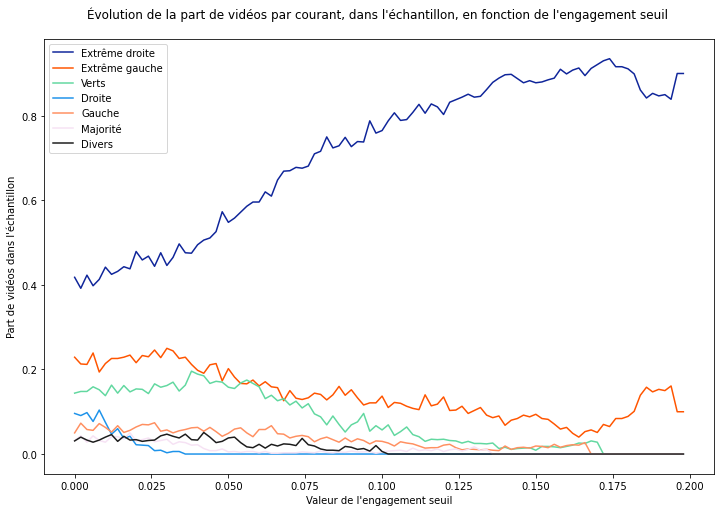

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(moyennes_xp.index, moyennes_xp['Taux Extrême droite'], label = 'Extrême droite',color = '#0F259A')
plt.plot(moyennes_xp.index, moyennes_xp['Taux Extrême gauche'], label = 'Extrême gauche',color = '#FF5500')
plt.plot(moyennes_xp.index, moyennes_xp['Taux Verts'], label = 'Verts',color = '#62D8A0')
plt.plot(moyennes_xp.index, moyennes_xp['Taux Droite'], label = 'Droite',color = '#1E93EA')
plt.plot(moyennes_xp.index, moyennes_xp['Taux Gauche'], label = 'Gauche',color = '#FF9061')
plt.plot(moyennes_xp.index, moyennes_xp['Taux Majorité'], label = 'Majorité',color = '#F6E2F4')
plt.plot(moyennes_xp.index, moyennes_xp['Taux Divers'], label = 'Divers',color = '#1c1c1c')
plt.xlabel("Valeur de l'engagement seuil")
plt.ylabel("Part de vidéos dans l'échantillon")
plt.title("Évolution de la part de vidéos par courant, dans l'échantillon, en fonction de l'engagement seuil \n")
plt.legend()
plt.show()

On voit clairement une tendance se dessiner avec l'augmentation progressive de la proportion de vidéos d'extrême droite. Ce taux démarre bien vers 40%, pour dépasser les 80% lorsque l'engagement seuil est vers 12%. Pour rendre le graphique plus lisible, on va lisser les courbes en faisant une moyenne glissante, sur 15 mesures par exemple.

In [23]:
lissage_seq2 = 15
moyennes_xp['minlissexd'] = moyennes_xp['Taux Extrême droite'].rolling(window=lissage_seq2).mean()
moyennes_xp['minlissexg'] = moyennes_xp['Taux Extrême gauche'].rolling(window=lissage_seq2).mean()
moyennes_xp['minlissed'] = moyennes_xp['Taux Droite'].rolling(window=lissage_seq2).mean()
moyennes_xp['minlissemaj'] = moyennes_xp['Taux Majorité'].rolling(window=lissage_seq2).mean()
moyennes_xp['minlisseg'] = moyennes_xp['Taux Gauche'].rolling(window=lissage_seq2).mean()
moyennes_xp['minlissev'] = moyennes_xp['Taux Verts'].rolling(window=lissage_seq2).mean()
moyennes_xp['minlissexdiv'] = moyennes_xp['Taux Divers'].rolling(window=lissage_seq2).mean()

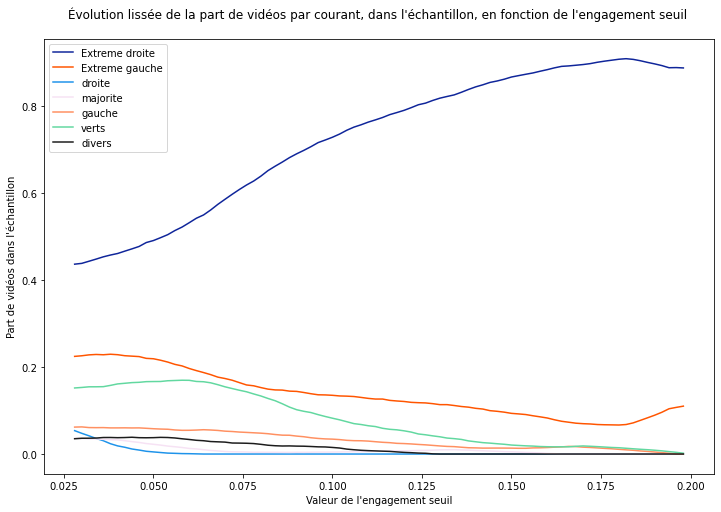

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(moyennes_xp.index, moyennes_xp['minlissexd'], label = "Extreme droite",color = '#0F259A')
plt.plot(moyennes_xp.index, moyennes_xp['minlissexg'], label = "Extreme gauche",color = '#FF5500')
plt.plot(moyennes_xp.index, moyennes_xp['minlissed'], label = "droite",color = '#1E93EA')
plt.plot(moyennes_xp.index, moyennes_xp['minlissemaj'], label = "majorite",color = '#F6E2F4')
plt.plot(moyennes_xp.index, moyennes_xp['minlisseg'], label = "gauche",color = '#FF9061')
plt.plot(moyennes_xp.index, moyennes_xp['minlissev'], label = "verts",color = '#62D8A0')
plt.plot(moyennes_xp.index, moyennes_xp['minlissexdiv'], label = "divers",color = '#1c1c1c')
plt.xlabel("Valeur de l'engagement seuil")
plt.ylabel("Part de vidéos dans l'échantillon")
plt.title("Évolution lissée de la part de vidéos par courant, dans l'échantillon, en fonction de l'engagement seuil \n")
plt.legend()
plt.show()

La tendance est frappante. Afin de la mettre en valeur dans l'article sur [le site 810](https://www.810.fr), on va afficher quelques valeurs :

In [25]:
moyennes_xp.loc[0.05:0.08, 'minlissexd']

seuil engagement
0.050    0.491000
0.052    0.497600
0.054    0.504533
0.056    0.514000
0.058    0.522000
0.060    0.532000
0.062    0.542333
0.064    0.549867
0.066    0.561333
0.068    0.574267
0.070    0.585933
0.072    0.597400
0.074    0.608400
0.076    0.618733
0.078    0.627867
0.080    0.639067
Name: minlissexd, dtype: float64